In [1]:

# Import libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import defaultdict, Counter
import html
import re
import emoji
from textblob import TextBlob


# Setup for inline plotting and better visuals
%matplotlib inline
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)  # Show all columns when displaying a DataFrame


In [2]:
# Load the training and test datasets
train = pd.read_csv("Corona_NLP_train.csv", encoding='ISO-8859-1')
test = pd.read_csv("Corona_NLP_test.csv", encoding='ISO-8859-1')


# Print the shape (rows, columns) of each dataset
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Display the first few rows of the training set
train.head()


Train shape: (41157, 6)
Test shape: (3798, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [3]:
# Show column data types, non-null counts, and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [4]:
df=pd.concat([train,test])
df['OriginalTweet']=df['OriginalTweet'].astype(str)
df['Sentiment']=df['Sentiment'].astype(str)

train['OriginalTweet']=train['OriginalTweet'].astype(str)
train['Sentiment']=train['Sentiment'].astype(str)

test['OriginalTweet']=test['OriginalTweet'].astype(str)
test['Sentiment']=test['Sentiment'].astype(str)





In [5]:
# Check how many missing values are in each column (if any)
missing = train.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))
# Count duplicated rows
print("Duplicate rows in train set:", train.duplicated().sum())


Location    8590
dtype: int64
Duplicate rows in train set: 0


In [6]:
# Value counts of target sentiment
print("🔢 Sentiment class distribution:")
print(train['Sentiment'].value_counts())

# Unique value counts per column
print("\n🔍 Number of unique values per column:")
print(train.nunique())

# Print one example tweet from each sentiment class
print("\n📝 Example tweet from each sentiment class:")
for sentiment in train['Sentiment'].unique():
    example = train[train['Sentiment'] == sentiment]['OriginalTweet'].iloc[0]
    print(f"\n➡ Sentiment: '{sentiment}'")
    print(example)


🔢 Sentiment class distribution:
Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

🔍 Number of unique values per column:
UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

📝 Example tweet from each sentiment class:

➡ Sentiment: 'Neutral'
@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8

➡ Sentiment: 'Positive'
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order

➡ Sentiment: 'Extremely Negative'
Me, ready to go at supermarket during the #COVID19 outbreak.

Not because I'm paranoid, but because my food stock is littera

In [7]:
# Length of each tweet
train['char_count'] = train['OriginalTweet'].apply(len)
train['word_count'] = train['OriginalTweet'].apply(lambda x: len(x.split()))

print("\n✂️ Tweet length (characters):")
print(train['char_count'].describe())

print("\n✂️ Tweet length (words):")
print(train['word_count'].describe())


✂️ Tweet length (characters):
count    41157.000000
mean       204.200160
std         68.655129
min         11.000000
25%        151.000000
50%        215.000000
75%        259.000000
max        355.000000
Name: char_count, dtype: float64

✂️ Tweet length (words):
count    41157.000000
mean        30.500304
std         11.591172
min          1.000000
25%         21.000000
50%         32.000000
75%         40.000000
max         64.000000
Name: word_count, dtype: float64


C:\Users\rabea\AppData\Local\Temp\ipykernel_20152\4213005975.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Sentiment', order=sentiment_order, palette=sentiment_palette)


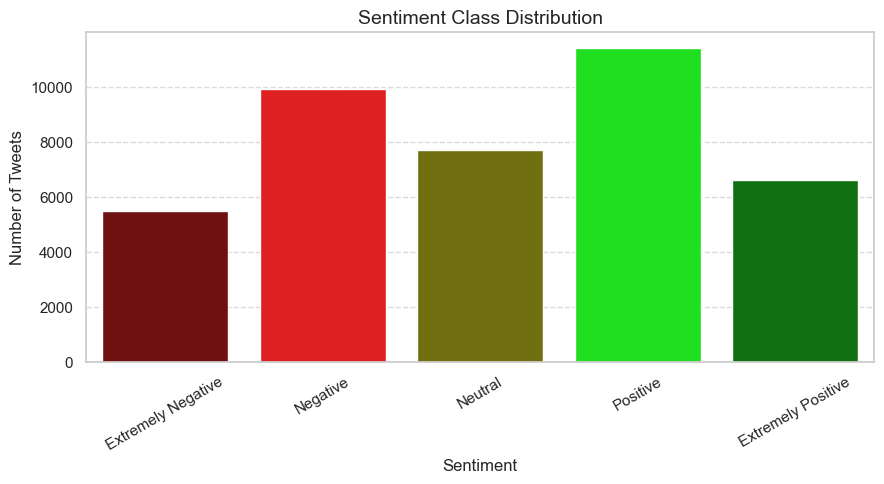

In [8]:

# setting the colors
sentiment_palette = {
    'Extremely Negative': '#800000',# dark red
    'Negative': '#ff0000',  # bright strong red
    'Neutral': '#808000',             # olive
    'Positive': '#00ff00',   # vibrant green
    'Extremely Positive': '#008000'# dark green
}


# Correct sentiment order
sentiment_order = ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']

plt.figure(figsize=(9, 5))
sns.countplot(data=train, x='Sentiment', order=sentiment_order, palette=sentiment_palette)
plt.title("Sentiment Class Distribution", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



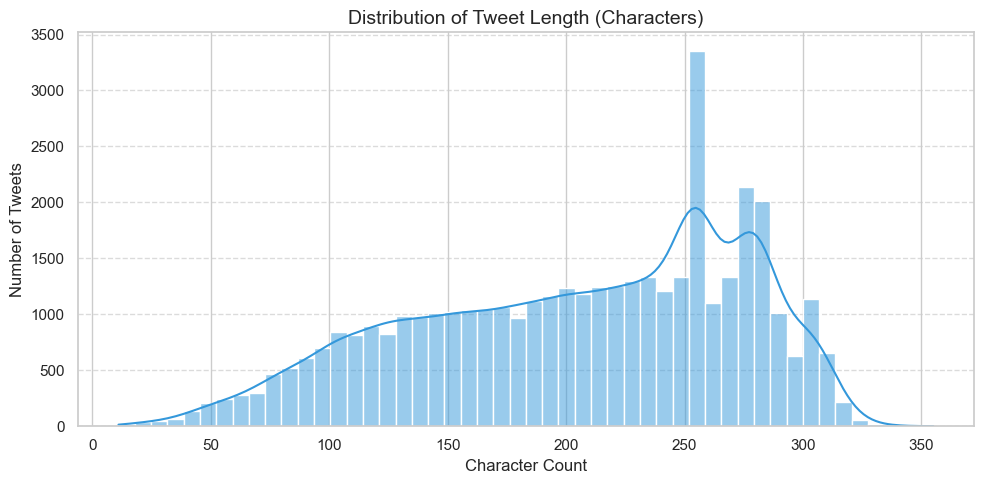

In [9]:
# Add character count column (if not already added)
train['char_count'] = train['OriginalTweet'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(data=train, x='char_count', bins=50, kde=True, color="#3498db")
plt.title("Distribution of Tweet Length (Characters)", fontsize=14)
plt.xlabel("Character Count")
plt.ylabel("Number of Tweets")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

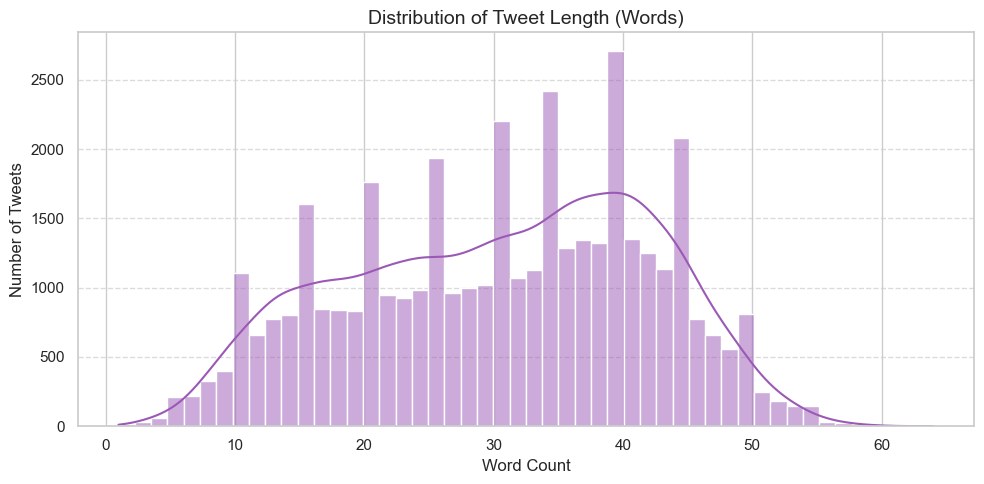

In [10]:
# Add word count column
train['word_count'] = train['OriginalTweet'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(data=train, x='word_count', bins=50, kde=True, color="#9b59b6")
plt.title("Distribution of Tweet Length (Words)", fontsize=14)
plt.xlabel("Word Count")
plt.ylabel("Number of Tweets")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\rabea\AppData\Local\Temp\ipykernel_20152\1072987796.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='Sentiment', y='word_count',


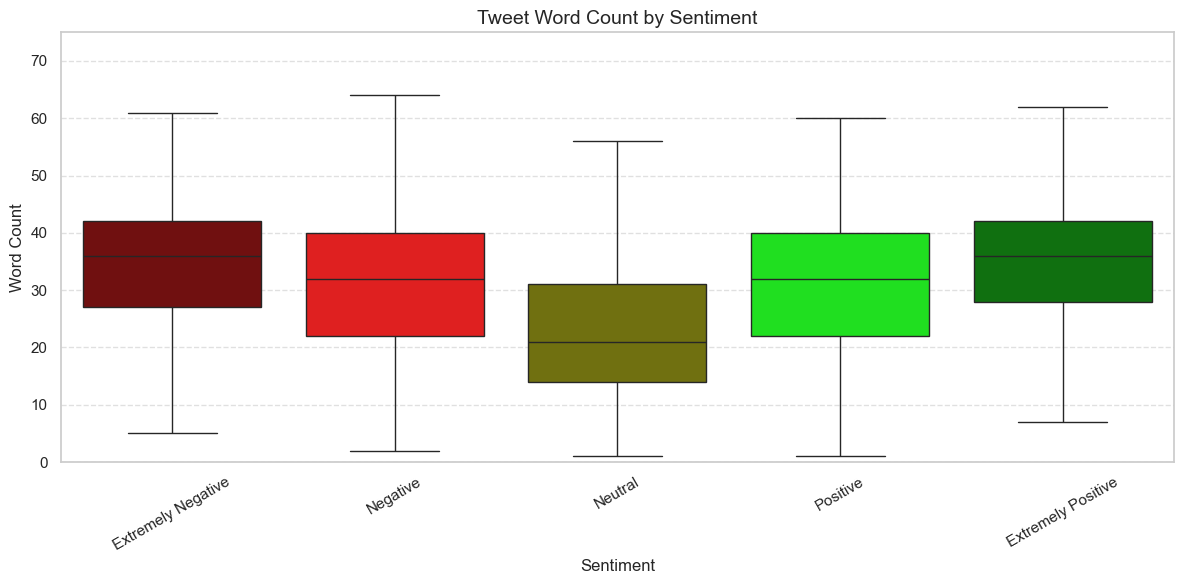

In [11]:
# Ensure word_count exists
if 'word_count' not in train.columns:
    train['word_count'] = train['OriginalTweet'].apply(lambda x: len(x.split()))

# Order and color palette
sentiment_order = ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']

# Plot
plt.figure(figsize=(12, 6))

# Just the boxplot
sns.boxplot(data=train, x='Sentiment', y='word_count',
            order=sentiment_order, palette=sentiment_palette, showfliers=False)

plt.title("Tweet Word Count by Sentiment", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Word Count")
plt.ylim(0, 75)  # Zoom in
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



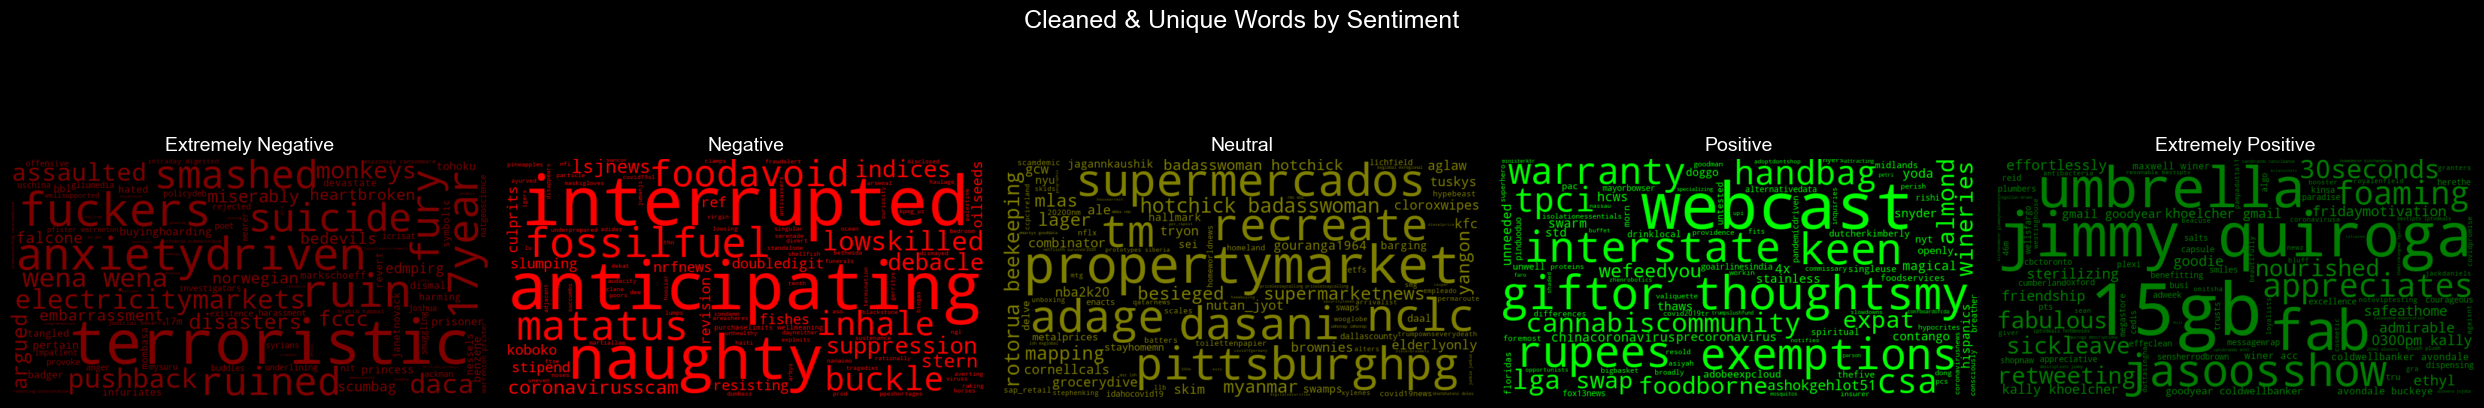

In [12]:
# Step 1: Clean tweets
# -----------------------------------
# Remove URLs
train['clean_text'] = train['OriginalTweet'].str.replace(r'http\S+', '', regex=True).str.strip()

# Decode HTML entities (e.g., &amp → &)
train['clean_text'] = train['clean_text'].apply(html.unescape)

# Remove non-ASCII characters (encoding noise like â, ®, etc.)
train['clean_text'] = train['clean_text'].str.encode('ascii', errors='ignore').str.decode('utf-8')

# Step 2: Normalize + tokenize for unique word filtering
# -----------------------------------
def tokenize(text):
    # Lowercase, remove punctuation, split to words
    return re.sub(r'[^\w\s]', '', text.lower()).split()

# Create a dictionary: {sentiment: set of words}
sentiment_words = defaultdict(set)

for sentiment in train['Sentiment'].unique():
    all_words = set()
    text = " ".join(train[train['Sentiment'] == sentiment]['clean_text'].astype(str))
    for word in tokenize(text):
        all_words.add(word)
    sentiment_words[sentiment] = all_words

# Step 3: Filter out shared words (appear in ≥ 2 sentiments)
# -----------------------------------
word_sentiment_count = Counter()

for sentiment, word_set in sentiment_words.items():
    for word in word_set:
        word_sentiment_count[word] += 1

# Only keep words unique to one sentiment
unique_words = {word for word, count in word_sentiment_count.items() if count == 1}

# Step 4: Generate and plot all 5 WordClouds
# -----------------------------------
sentiment_order = ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']

fig, axes = plt.subplots(1, 5, figsize=(25, 5), facecolor='black')

for i, sentiment in enumerate(sentiment_order):
    # Collect all unique words for this sentiment
    words = []
    for tweet in train[train['Sentiment'] == sentiment]['clean_text']:
        for word in tokenize(tweet):
            if word in unique_words:
                words.append(word)
    text = " ".join(words)

    # Generate WordCloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='black',
        color_func=lambda *args, **kwargs: sentiment_palette[sentiment],
        max_words=100,
        stopwords=None
    ).generate(text)

    # Plot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(sentiment, fontsize=14, color='white')

plt.suptitle("Cleaned & Unique Words by Sentiment", fontsize=18, color='white')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()



In [17]:
import country_converter as coco

# Clean text
train['CleanLocation'] = train['Location'].str.lower().str.strip()

# Try to convert to country names
train['InferredCountry'] = coco.convert(names=train['CleanLocation'], to='name_short')

# Optional: check failed matches
failed = train[train['InferredCountry'] == 'not found']


london not found in regex
nan not found in ISO3
nan not found in ISO3
ãt: 36.319708,-82.363649 not found in regex
35.926541,-78.753267 not found in regex
atlanta, ga usa not found in regex
bhavnagar,gujrat not found in regex
makati, manila not found in regex
horningsea not found in regex
chicago, il not found in regex
nan not found in ISO3
houston, texas not found in regex
north america not found in regex
denver, co not found in regex
southampton soxx xxx not found in regex
global not found in regex
nan not found in ISO3
nan not found in ISO3
downstage centre not found in regex
london not found in regex
ketchum, idaho not found in regex
everywhere you are! not found in regex
new york, ny not found in regex
someplace, usa not found in regex
nan not found in ISO3
nan not found in ISO3
markham, ontario not found in regex
sverige not found in regex
where the wild things are not found in regex
nan not found in ISO3
fort worth, texas not found in regex
nan not found in ISO3
houston not foun

KeyboardInterrupt: 

🔹 Extracting hashtags, mentions, and URLs...

✅ Sample counts:


,OriginalTweet,HashtagCount,MentionCount,URLCount
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,3,3
1,advice Talk to your neighbours family to excha...,0,0,0
2,Coronavirus Australia: Woolworths to give elde...,0,0,1
3,My food stock is not the only one which is emp...,7,0,1
4,"Me, ready to go at supermarket during the #COV...",6,0,1



📊 Distribution of Hashtag Count:


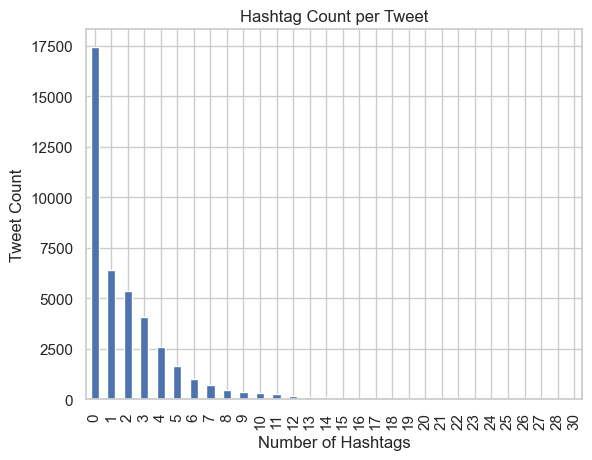


📊 Distribution of Mention Count:


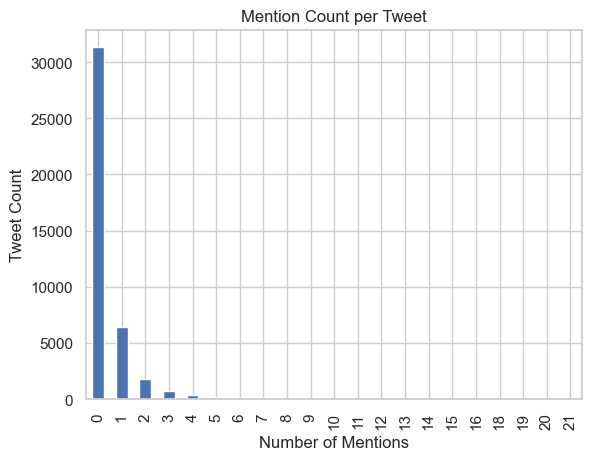


📊 Distribution of URL Count:


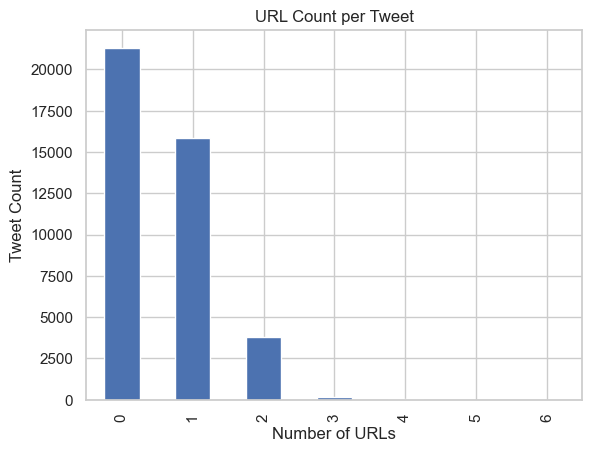

In [13]:

# Show all columns in output
pd.set_option('display.max_columns', None)

# Step 2: Extract Hashtags, Mentions, URLs
print("🔹 Extracting hashtags, mentions, and URLs...")

train['HashtagCount'] = train['OriginalTweet'].str.count(r'#\w+')
train['MentionCount'] = train['OriginalTweet'].str.count(r'@\w+')
train['URLCount'] = train['OriginalTweet'].str.count(r'http\S+')

print("\n✅ Sample counts:")
display(train[['OriginalTweet', 'HashtagCount', 'MentionCount', 'URLCount']].head(5))

# Distribution plots
print("\n📊 Distribution of Hashtag Count:")
train['HashtagCount'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Number of Hashtags")
plt.ylabel("Tweet Count")
plt.title("Hashtag Count per Tweet")
plt.show()

print("\n📊 Distribution of Mention Count:")
train['MentionCount'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Number of Mentions")
plt.ylabel("Tweet Count")
plt.title("Mention Count per Tweet")
plt.show()

print("\n📊 Distribution of URL Count:")
train['URLCount'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Number of URLs")
plt.ylabel("Tweet Count")
plt.title("URL Count per Tweet")
plt.show()


In [14]:
print("🔹 10 tweets with NO hashtags:\n")

no_hashtag_tweets = train[train['HashtagCount'] == 0].copy()

for i, tweet in enumerate(no_hashtag_tweets['OriginalTweet'].head(10), 1):
    print(f"{i}. {tweet}\n")


🔹 10 tweets with NO hashtags:

1. @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8

2. advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order

3. Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P

4. As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU

5. Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business or classes for the next two weeks, beginning Monday, March 16.  We will continue to process online and phone orders as no

we notice that the 8th row still has a "#" but its a weird tweet that doesnt mean anything, its probably due to data corruption, so we take care of data like that.

✅ Mean question marks per tweet: 0.57
✅ Standard deviation: 4.07


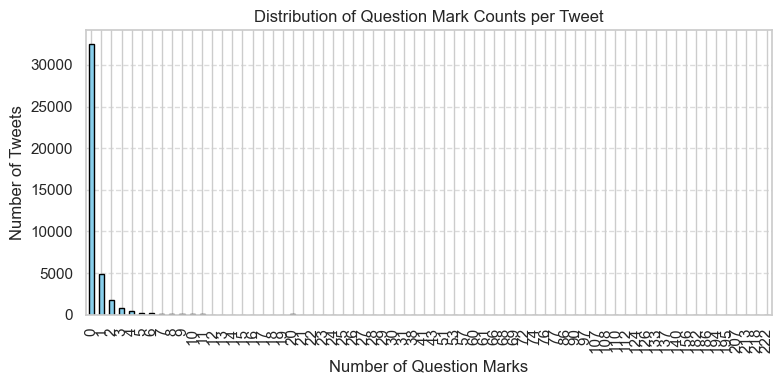

In [19]:

# Step 1: Count question marks
train['QuestionMarkCount'] = train['OriginalTweet'].str.count(r'\?')

# Step 2: Calculate stats
mean_q = train['QuestionMarkCount'].mean()
std_q = train['QuestionMarkCount'].std()

print(f"✅ Mean question marks per tweet: {mean_q:.2f}")
print(f"✅ Standard deviation: {std_q:.2f}")

# Step 3: Plot distribution
plt.figure(figsize=(8, 4))
train['QuestionMarkCount'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Question Mark Counts per Tweet")
plt.xlabel("Number of Question Marks")
plt.ylabel("Number of Tweets")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [20]:
max_q = train['QuestionMarkCount'].max()
print(f"🚨 Maximum number of question marks in a single tweet: {max_q}")


🚨 Maximum number of question marks in a single tweet: 222


showing the distribution of more than 0 question marks for a better visual:

✅ Mean question marks per tweet : 0.57
✅ Standard deviation : 4.07


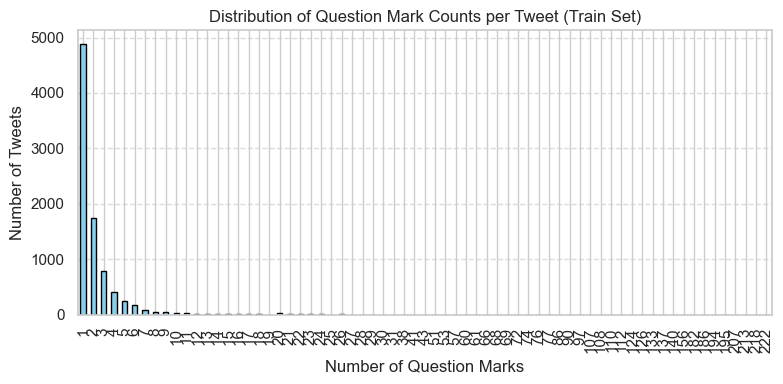

In [22]:
import matplotlib.pyplot as plt

# Step 1: Count question marks
train['QuestionMarkCount'] = train['OriginalTweet'].str.count(r'\?')

# Step 2: Calculate stats
mean_q = train['QuestionMarkCount'].mean()
std_q = train['QuestionMarkCount'].std()

print(f"✅ Mean question marks per tweet : {mean_q:.2f}")
print(f"✅ Standard deviation : {std_q:.2f}")

# Step 3: Plot distribution (only tweets with >0 question marks)
plt.figure(figsize=(8, 4))
train[train['QuestionMarkCount'] > 0]['QuestionMarkCount'] \
    .value_counts() \
    .sort_index() \
    .plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Distribution of Question Mark Counts per Tweet (Train Set)")
plt.xlabel("Number of Question Marks")
plt.ylabel("Number of Tweets")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



we have decided to drop tweets where there are question marks more than normal charchters

In [24]:
# Count question marks
train['QuestionMarkCount'] = train['OriginalTweet'].str.count(r'\?')

# Count alphabetic letters only (A-Z and a-z)
train['LetterCount'] = train['OriginalTweet'].str.count(r'[A-Za-z]')

# Drop tweets where ? > letters
num_dropped = (train['QuestionMarkCount'] > train['LetterCount']).sum()
print(f"🚮 Tweets dropped (more ? than letters): {num_dropped}")

train = train[train['QuestionMarkCount'] <= train['LetterCount']].copy()


🚮 Tweets dropped (more ? than letters): 30


now we look at mentions

✅ Mean mentions per tweet: 0.43
✅ Standard deviation: 1.13


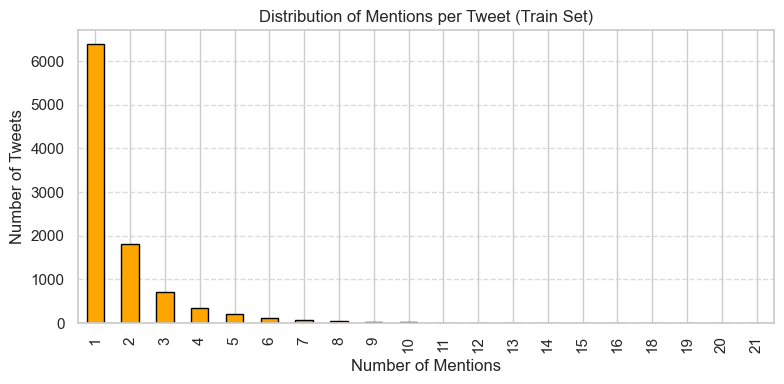

🏆 Top 10 most mentioned usernames:
@realDonaldTrump: 247
@Tesco: 185
@sainsburys: 161
@BorisJohnson: 150
@narendramodi: 109
@amazon: 109
@asda: 105
@PMOIndia: 96
@Morrisons: 90
@piersmorgan: 85


In [25]:
train['MentionCount'] = train['OriginalTweet'].str.count(r'@\w+')

mean_m = train['MentionCount'].mean()
std_m = train['MentionCount'].std()

print(f"✅ Mean mentions per tweet: {mean_m:.2f}")
print(f"✅ Standard deviation: {std_m:.2f}")

# Distribution plot (only where mentions > 0)
plt.figure(figsize=(8, 4))
train[train['MentionCount'] > 0]['MentionCount'] \
    .value_counts() \
    .sort_index() \
    .plot(kind='bar', color='orange', edgecolor='black')

plt.title("Distribution of Mentions per Tweet (Train Set)")
plt.xlabel("Number of Mentions")
plt.ylabel("Number of Tweets")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

def extract_mentions(text):
    return re.findall(r'@\w+', text)

# Flatten list of all mentions in all tweets
all_mentions = train['OriginalTweet'].apply(extract_mentions).explode()
top_mentions = Counter(all_mentions.dropna()).most_common(10)

print("🏆 Top 10 most mentioned usernames:")
for mention, count in top_mentions:
    print(f"{mention}: {count}")



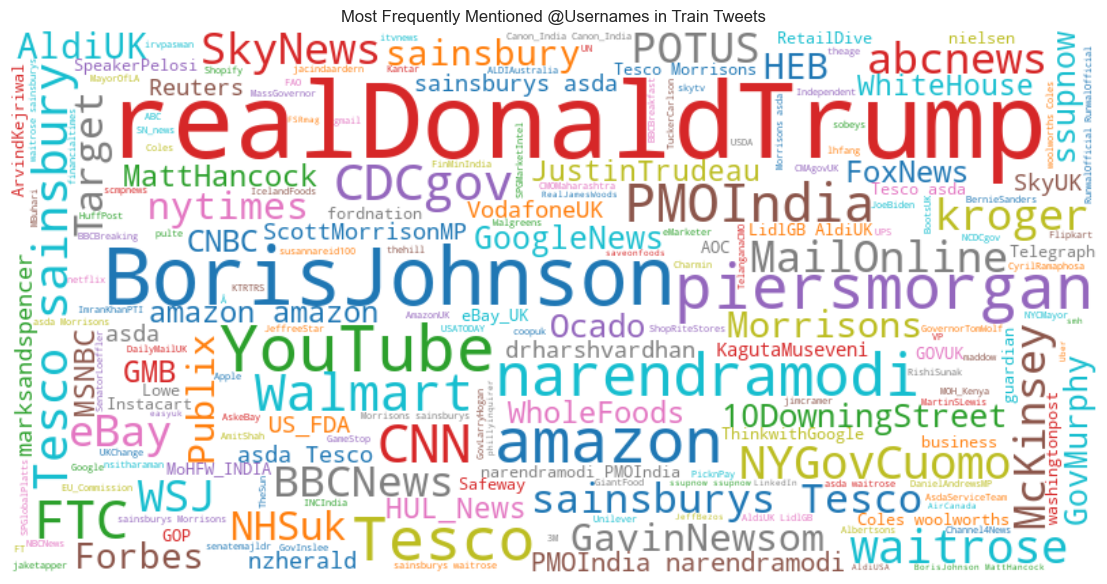

In [26]:

def extract_mentions(text):
    return re.findall(r'@\w+', text)

train['MentionsList'] = train['OriginalTweet'].apply(extract_mentions)
from itertools import chain

all_mentions = list(chain.from_iterable(train['MentionsList']))


# Join all mentions into one string (space-separated)
mention_text = " ".join(all_mentions)

# Generate word cloud
wc = WordCloud(width=800, height=400, background_color='white', colormap='tab10').generate(mention_text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequently Mentioned @Usernames in Train Tweets")
plt.tight_layout()
plt.show()


checking sentiments for top 5 mentioned accounts

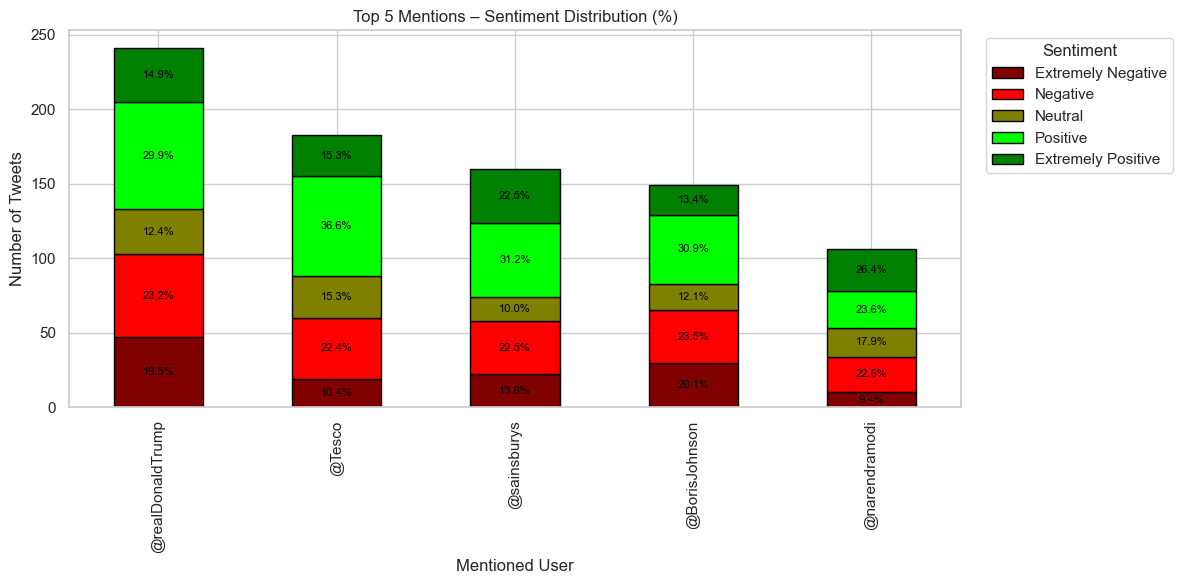

In [28]:

# Step 1: Extract mentions
train['MentionsList'] = train['OriginalTweet'].apply(lambda x: re.findall(r'@\w+', x))

# Step 2: Get top 5 mentions
all_mentions = train['MentionsList'].explode()
top_mentions = all_mentions.value_counts().head(5).index.tolist()

# Step 3: Create mention flags
for mention in top_mentions:
    train[f'has_{mention}'] = train['MentionsList'].apply(lambda x: mention in x)

# Step 4: Count sentiment distribution for each mention
sentiment_mention_counts = pd.DataFrame()

for mention in top_mentions:
    counts = train[train[f'has_{mention}']].groupby('Sentiment').size()
    sentiment_mention_counts[mention] = counts

sentiment_mention_counts = sentiment_mention_counts.fillna(0).astype(int)
sentiment_mention_counts = sentiment_mention_counts.reindex([
    'Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'
])  # ensure sentiment order

# Step 5: Plotting with custom palette
sentiment_palette = {
    'Extremely Negative': '#800000',
    'Negative': '#ff0000',
    'Neutral': '#808000',
    'Positive': '#00ff00',
    'Extremely Positive': '#008000'
}

ax = sentiment_mention_counts.T.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=[sentiment_palette[s] for s in sentiment_mention_counts.index],
    edgecolor='black'
)

plt.title("Top 5 Mentions – Sentiment Distribution (%)")
plt.xlabel("Mentioned User")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

# Step 6: Annotate with percentages
for bar_idx, user in enumerate(sentiment_mention_counts.columns):
    total = sentiment_mention_counts[user].sum()
    bottom = 0
    for sentiment in sentiment_mention_counts.index:
        value = sentiment_mention_counts.loc[sentiment, user]
        if value > 0:
            pct = (value / total) * 100
            ax.text(bar_idx, bottom + value / 2, f"{pct:.1f}%", ha='center', va='center', fontsize=8, color='black')
            bottom += value

plt.show()


C:\Users\rabea\AppData\Local\Temp\ipykernel_20152\2766361405.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


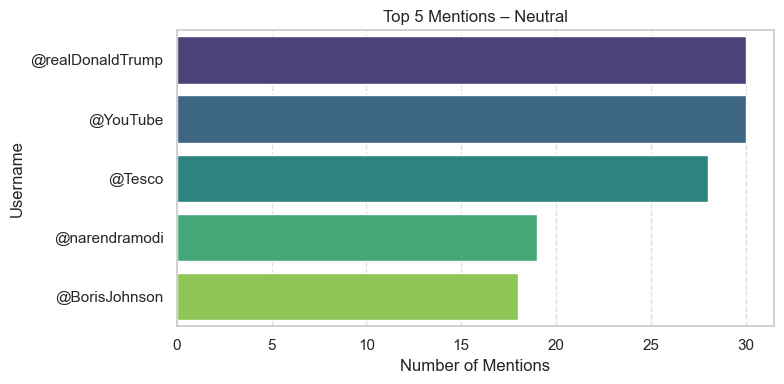

C:\Users\rabea\AppData\Local\Temp\ipykernel_20152\2766361405.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


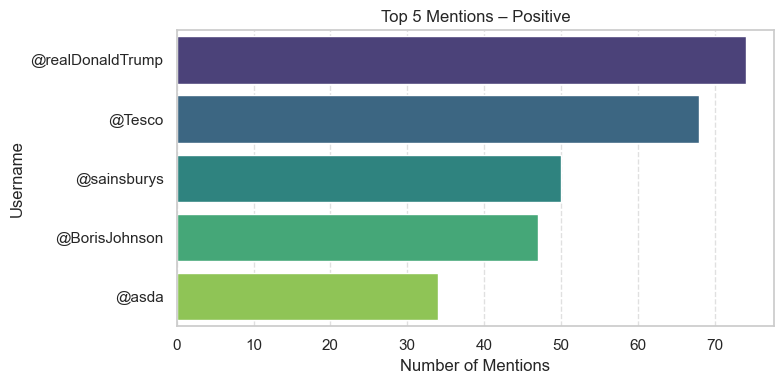

C:\Users\rabea\AppData\Local\Temp\ipykernel_20152\2766361405.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


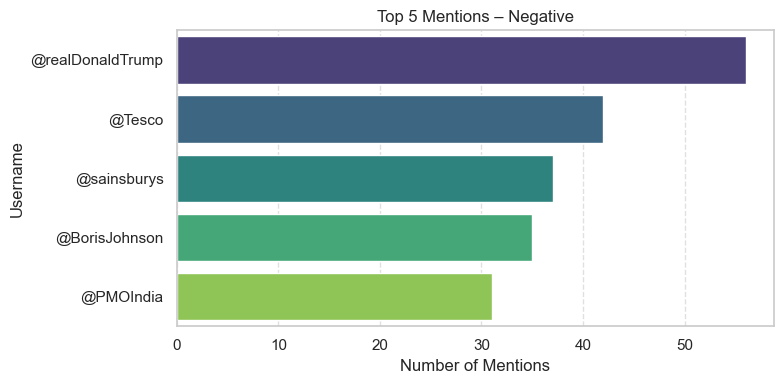

C:\Users\rabea\AppData\Local\Temp\ipykernel_20152\2766361405.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


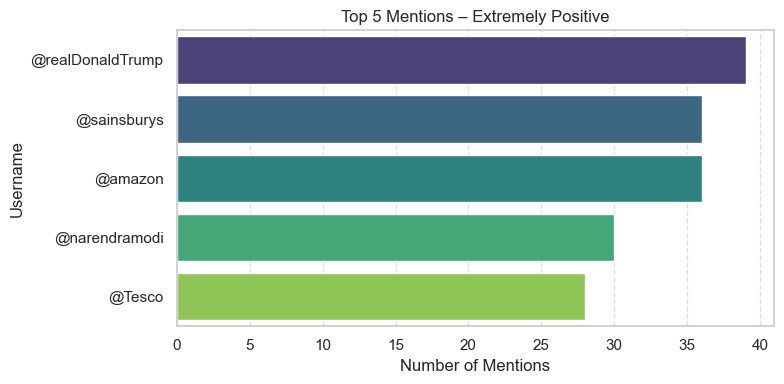

C:\Users\rabea\AppData\Local\Temp\ipykernel_20152\2766361405.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


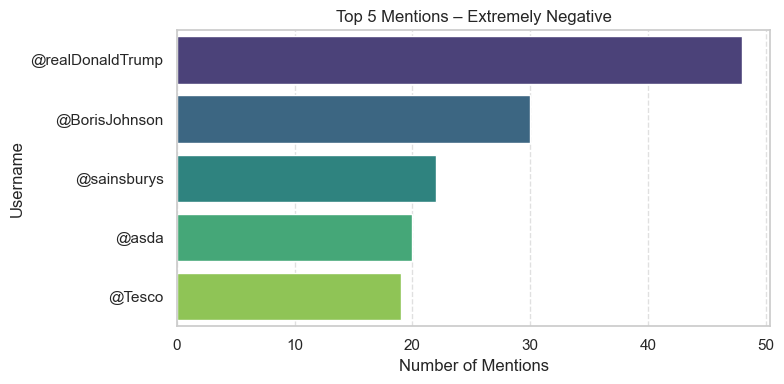

In [30]:

# Step 1: Extract mentions if not done
train['MentionsList'] = train['OriginalTweet'].apply(lambda x: re.findall(r'@\w+', x))

# Step 2: Explode mentions
exploded = train.explode('MentionsList')
exploded = exploded[exploded['MentionsList'].notna()]

# Step 3: Unique sentiment list
sentiments = exploded['Sentiment'].unique()

# Step 4: Plot per sentiment
for sentiment in sentiments:
    subset = exploded[exploded['Sentiment'] == sentiment]
    top_mentions = subset['MentionsList'].value_counts().head(5)

    # Create figure
    plt.figure(figsize=(8, 4))
    sns.barplot(
        x=top_mentions.values,
        y=top_mentions.index,
        palette='viridis'
    )

    plt.title(f"Top 5 Mentions – {sentiment}")
    plt.xlabel("Number of Mentions")
    plt.ylabel("Username")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [21]:
print("✅ 10 tweets with NO URLs:")
no_urls = train[train['URLCount'] == 0]
display(no_urls[['OriginalTweet', 'URLCount']].head(10))


✅ 10 tweets with NO URLs:


,OriginalTweet,URLCount
1,advice Talk to your neighbours family to excha...,0
9,"For corona prevention,we should stop to buy th...",0
11,"Due to the Covid-19 situation, we have increas...",0
19,"For those who aren't struggling, please consid...",0
20,with 100 nations inficted with covid 19 th...,0
22,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,0
23,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,0
24,@10DowningStreet @grantshapps what is being do...,0
29,@7SealsOfTheEnd Soon with dwindling supplies u...,0
30,There Is of in the Country The more empty she...,0
